In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

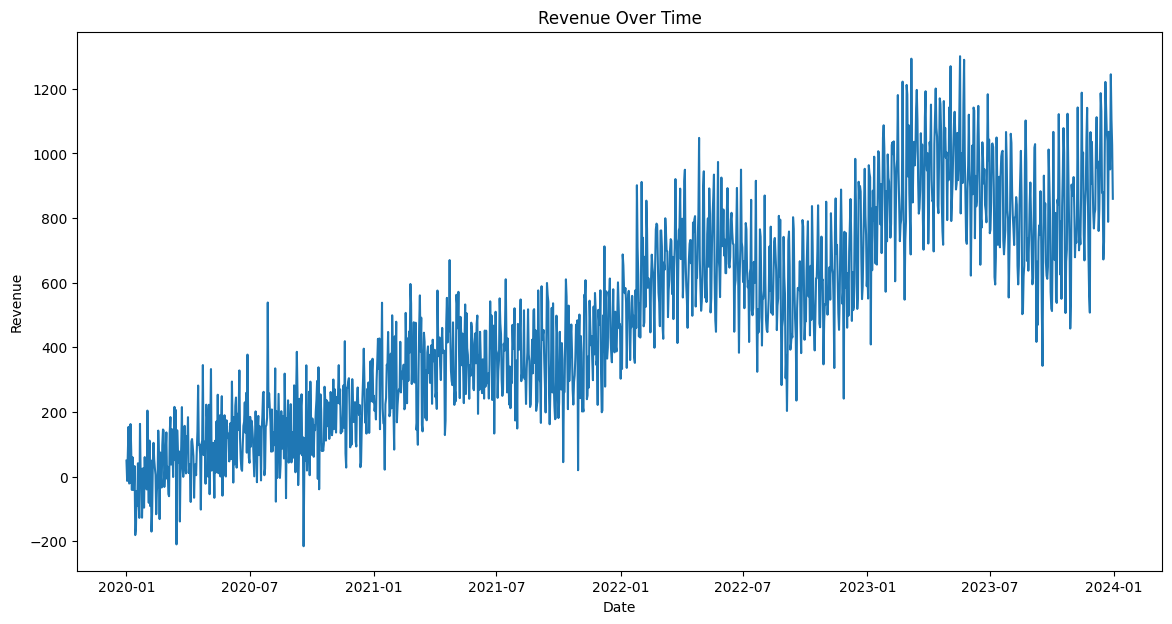

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)  # for reproducibility
periods = 4 * 365  # 4 years of daily data
date_range = pd.date_range(start='2020-01-01', periods=periods, freq='D')

# Base trend
trend = np.linspace(0, 1, periods) * 1000  # increasing trend

# Weekly seasonality (sinusoidal pattern with weekly frequency)
weekly_seasonality = 100 * np.sin(2 * np.pi * date_range.dayofweek / 7)

# Yearly seasonality (two spikes: one in summer and one around Christmas)
days_in_year = 365.25
summer_spike = 200 * np.sin(2 * np.pi * (date_range.dayofyear - 172) / days_in_year)  # around mid-June
christmas_spike = 300 * np.sin(2 * np.pi * (date_range.dayofyear - 359) / days_in_year)  # around Christmas

# Combined seasonality
seasonality = weekly_seasonality + summer_spike + christmas_spike
seasonality *=  np.linspace(0,2, periods)

# Random noise
noise = np.random.normal(0, 100, periods) 

# Revenue = trend + seasonality + noise
revenue = trend + seasonality  + noise

# Create DataFrame
data = pd.DataFrame({'date': date_range, 'revenue': revenue})
data.set_index('date', inplace=True)

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['revenue'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

data.to_csv("data/revenue.csv", index=True)


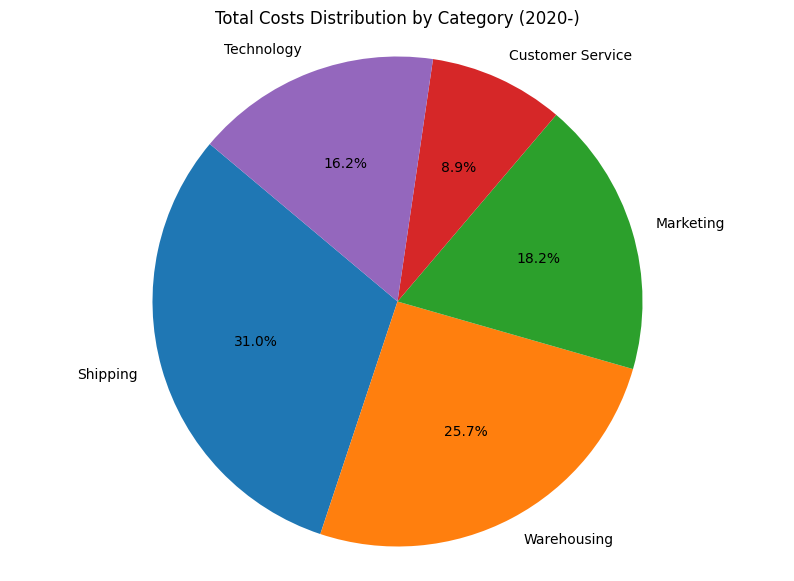

In [54]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Define date range
periods = 4 * 12  # 4 years of daily data
date_range = pd.date_range(start='2020-01-01', periods=periods, freq='ME')

# Generate costs data
cost_data = {
    'Date': date_range,
    'Shipping': np.random.uniform(20000, 50000, len(date_range)),
    'Warehousing': np.random.uniform(15000, 40000, len(date_range)),
    'Marketing': np.random.uniform(10000, 30000, len(date_range)),
    'Customer Service': np.random.uniform(5000, 15000, len(date_range)),
    'Technology': np.random.uniform(10000, 25000, len(date_range)),
}

# Create DataFrame
df = pd.DataFrame(cost_data)

cost_summary = df[['Shipping', 'Warehousing', 'Marketing', 'Customer Service', 'Technology']].sum()

# Create a pie plot
plt.figure(figsize=(10, 7))
plt.pie(cost_summary, labels=cost_summary.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Costs Distribution by Category (2020-)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

cost_summary.reset_index().rename({"index": "process", 0: "cost"}, axis=1).to_csv("data/cost.csv", index=False)

In [52]:
cost_summary.reset_index().rename({"index": "process", 0: "cost"}, axis=1)

,process,cost
0,Shipping,1.606939e+06
1,Warehousing,1.329246e+06
2,Marketing,9.446897e+05
3,Customer Service,4.612049e+05
4,Technology,8.396952e+05


In [47]:
data

,revenue
date,
2020-01-01,49.671415
2020-01-02,-13.082460
2020-01-03,66.023682
2020-01-04,153.969921
2020-01-05,-21.077294
...,...
2023-12-26,950.581093
2023-12-27,1244.770720
2023-12-28,1103.769275


In [11]:
np.random.normal(0, 10, periods) * np.linspace(0,1, periods)

array([-0.00000000e+00,  5.10627356e-03, -2.66891427e-03, ...,
        2.03927038e+01,  2.95077555e+00, -7.76499140e+00])